# Downloading & loading data

datasourse: [London Datastore](https://data.london.gov.uk/dataset/london-fire-brigade-incident-records)

In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.figure_factory as ff

import requests
import re


In [62]:
data_url = "https://data.london.gov.uk/download/london-fire-brigade-incident-records/f5066d66-c7a3-415f-9629-026fbda61822/LFB%20Incident%20data%20Last%203%20years.csv"
meta_url = "https://data.london.gov.uk/download/london-fire-brigade-incident-records/cb9d6550-e502-40a9-a5e4-1f055f31316f/Metadata.xlsx"


In [63]:
# read the data
data = pd.read_csv(data_url)

# send a request to the url
response = requests.get(meta_url)

# save the response content to a file
with open("metadata.xlsx", "wb") as file:
    file.write(response.content)

# Read the Excel file using pandas
meta_data = pd.read_excel("metadata.xlsx")


In [64]:
print('Metadata:\n')
for x, y in enumerate(meta_data.iterrows()):
  print(f"{x}. {y[1][0]}\nsample: {y[1][1]}\nDescription: {y[1][2]}\n")

Metadata:

0. IncidentNumber
sample: 000008-01012018
Description: LFB Incident Number

1. DateOfCall
sample: 2018-01-01 00:00:00
Description: Date of 999 call

2. CalYear
sample: 2018
Description: Year of 999 call

3. TimeOfCall
sample: 00:04:25
Description: Time of 999 call

4. HourOfCall
sample: 0
Description: Hour of 999 call

5. IncidentGroup
sample: False Alarm
Description: High level incident category

6. StopCodeDescription
sample: AFA
Description: Detailed incident category

7. SpecialServiceType
sample: nan
Description: Further detail for special services incident categories

8. PropertyCategory
sample: Non Residential
Description: High level property descriptor

9. PropertyType
sample: Mosque 
Description: Detailed property descriptor

10. AddressQualifier
sample: Within same building
Description: Qualifies location of actual incident relevant to category above

11. Postcode_full
sample: N2 8AY
Description: Postcode

12. Postcode_district
sample: N2
Description: Postcode Dist

## Sample

In [ ]:
data.sample(n=7)

IncidentNumber   DateOfCall  CalYear TimeOfCall  HourOfCall  \
177970  130518-29092021  29 Sep 2021     2021   07:33:16           7   
219619  018331-08022022  08 Feb 2022     2022   12:04:16          12   
77550   131423-11102020  11 Oct 2020     2020   19:29:16          19   
255269  077741-30052022  30 May 2022     2022   19:00:14          19   
121465  037097-02042021  02 Apr 2021     2021   20:39:26          20   
20959   034195-19032020  19 Mar 2020     2020   18:36:08          18   
299073  159828-27092022  27 Sep 2022     2022   03:05:21           3   

          IncidentGroup StopCodeDescription            SpecialServiceType  \
177970             Fire      Secondary Fire                           NaN   
219619      False Alarm                 AFA                           NaN   
77550   Special Service     Special Service                           RTC   
255269      False Alarm                 AFA                           NaN   
121465      False Alarm                 AFA                           NaN   
20959       False Alarm                 AFA                           NaN   
299073  Special Service     Special Service  Hazardous Materials incident   

         PropertyCategory                                       PropertyType  \
177970  Outdoor Structure                     Small refuse/rubbish container   
219619           Dwelling  Purpose Built Flats/Maisonettes - 4 to 9 storeys    
77550        Road Vehicle                                        Motorcycle    
255269    Non Residential            Other industrial manufacturing facility   
121465           Dwelling  Purpose Built Flats/Maisonettes - Up to 3 stor...   
20959            Dwelling                          House - single occupancy    
299073           Dwelling  Purpose Built Flats/Maisonettes - Up to 3 stor...   

        ... FirstPumpArriving_AttendanceTime  \
177970  ...                            225.0   
219619  ...                            195.0   
77550   ...                            118.0   
255269  ...                            349.0   
121465  ...                            268.0   
20959   ...                            766.0   
299073  ...                            322.0   

       FirstPumpArriving_DeployedFromStation  \
177970                              Richmond   
219619                              Shadwell   
77550                              Islington   
255269                             Tottenham   
121465                            Hillingdon   
20959                             Paddington   
299073                       Stoke Newington   

       SecondPumpArriving_AttendanceTime  \
177970                               NaN   
219619                             336.0   
77550                                NaN   
255269                               NaN   
121465                             272.0   
20959                              770.0   
299073                               NaN   

        SecondPumpArriving_DeployedFromStation  NumStationsWithPumpsAttending  \
177970                                     NaN                            1.0   
219619                                  Poplar                            4.0   
77550                                      NaN                            1.0   
255269                                     NaN                            1.0   
121465                              Hillingdon                            1.0   
20959                               Paddington                            1.0   
299073                                     NaN                            1.0   

       NumPumpsAttending PumpCount PumpHoursRoundUp Notional Cost (£) NumCalls  
177970               1.0       1.0              1.0             352.0      1.0  
219619               4.0       4.0              2.0             704.0      1.0  
77550                1.0       1.0              1.0             346.0      1.0  
255269               1.0       1.0              1.0             364.0      1.0

## Defining useful functions

### Info2

In [65]:
def info2(df,h=1000):

  import plotly.graph_objects as go

  header = ['column name', 'dtype', 'entries', 'missing', 'missing %','unique values', 'most freaquent', 'sample value']
  dtype = [str(x) for x in list(df.dtypes)]
  missing = list(df.isnull().sum())
  per = list((df.isnull().mean() * 100).round(2))
  count = list(df.count().values)
  unique = list(df.nunique())
  sample = list(df.sample(n=1, random_state=98).copy().iloc[0])
  mf = []
  for x in df.columns:
    try:
      y = df[x].value_counts().idxmax()
      mf.append(y)
    except:
      mf.append(np.nan)



  info_frame=pd.DataFrame(columns=header)

  info_frame['column name'] = df.columns
  info_frame['dtype'] = dtype
  info_frame['entries'] = count
  info_frame['missing'] = missing
  info_frame['missing %'] = per
  info_frame['unique values'] = unique
  info_frame['most freaquent'] = mf
  info_frame['sample value'] = sample
  # print('Table shape:', df.shape[0], 'rows and', df.shape[1], 'columns\n')

  # del header, missing, per, count, sample, #info_frame

  info_table = go.Figure(data=[go.Table(
    header=dict(values=list(info_frame.columns),
                line_color='ivory',
                fill_color='darkgrey',
                align='left',
                # font=dict(color='ivory')
                ),
    cells=dict(values= info_frame.values.T.tolist(), # list of lists where each list is a column
               line_color='#eeeedd',
               fill_color='ivory',
               align='left',
              #  font=dict(color='#4d1919')
               ))])

  info_table.update_layout(title='Information about the dataset', height=h)
  info_table.show()

  #printing table summary
  print(f"Table shape: {df.shape[0]} rows and {df.shape[1]} columns.\n")
  print(f"Size: {data.size} cells\n")

  y = info_frame.shape[0]
  x = info_frame[info_frame['missing %'] > 0].shape[0]
  c = list(info_frame.loc[info_frame['missing %'] > 0,'column name'])

  print(f"{x} or {round(x/y*100,0)}% out of {y} columns have missing values.\n\nColumns with missing values: \n{c}")
  print(f"\n{data.isnull().sum().sum()} missing values or {round(data.isnull().sum().sum() / data.size * 100,2)}% of all values.\n")

  if data.duplicated().sum() != 0:
    if data.duplicated().sum() == 1:
      print(f"{data.duplicated().sum()} duplicated row.\n")
    else:
      print(f"{data.duplicated().sum()} duplicated rows.\n")
  else:
    print("No duplicated rows.\n")

  return info_frame

### X-Ray

In [66]:
#X-RAY
def xray(df):
  xray = px.imshow(df.isnull())
  xray.update_layout(title="Missing Values X-Ray",coloraxis_showscale=False, width=1000, height=600)
  xray.show()

### Looking for symbols

In [67]:
#function to look for unallowed symbols

def find_unallowed_symbols(data, column, allowed_symbols):
    pattern = r"[^a-zA-Z0-9" + re.escape(allowed_symbols) + "]"
    unique_values = data[column].unique()
    unallowed_symbols = set()

    for value in unique_values:
        symbols = re.findall(pattern, str(value))
        unallowed_symbols.update(symbols)

    return list(unallowed_symbols)

### Seconds to Minutes


In [68]:
def secs2mins(seconds):
    hours = seconds // 3600  # Get the number of whole hours
    minutes = (seconds % 3600) // 60  # Get the number of whole minutes
    remaining_seconds = seconds % 60  # Get the remaining seconds

    if hours > 0:
        if minutes > 0 and remaining_seconds > 0:
            return f"{hours} hr {minutes} min {remaining_seconds} sec"
        elif minutes > 0:
            return f"{hours} hr {minutes} min"
        elif remaining_seconds > 0:
            return f"{hours} hr {remaining_seconds} sec"
        else:
            return f"{hours} hr"
    elif minutes > 0:
        if remaining_seconds > 0:
            return f"{minutes} min {remaining_seconds} sec"
        else:
            return f"{minutes} min"
    else:
        return f"{remaining_seconds} sec"

In [69]:
secs2mins(401)

'6 min 41 sec'

# Data examination & Transformation

## Quick Insights

In [ ]:
info_frame = info2(data,h=1100)

Table shape: 381366 rows and 39 columns.

Size: 14873274 cells

15 or 38.0% out of 39 columns have missing values.

Columns with missing values: 
['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m', 'Latitude', 'Longitude', 'FirstPumpArriving_AttendanceTime', 'FirstPumpArriving_DeployedFromStation', 'SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp', 'Notional Cost (£)']

1872174 missing values or 12.59% of all values.

No duplicated rows.



In [70]:
xray(data)

Quick Insights:
- no duplicated rows
- 12% of all values are missing
- the missing data follows a pattern - mostly *location* data is missing
- data could be missing due to unknown yet logic, example - False alarms signals

Let's examine this further.

For the purpose of this project, we need some columns only.

In [71]:
data = data[['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'Postcode_full',
       'Postcode_district', 'IncGeo_BoroughName', 'IncGeo_WardNameNew',
       'Latitude', 'Longitude',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'NumCalls', 'Notional Cost (£)']]

## Missing values

In [72]:
#selecting only rows with fire incidents
fire_inc_data = data[data['IncidentGroup'] == 'Fire'].copy()

# xray(fire_inc_data)

missing = pd.DataFrame(data=data.isnull().sum())
missing.columns = ['missing before']
missing['% before'] = data.isnull().mean().round(2)*100
missing['missing now'] = fire_inc_data.isnull().sum()
missing['% now'] = fire_inc_data.isnull().mean().round(2)*100
missing['diff'] = missing['missing before'] - missing['missing now']
missing['diff %'] = missing['% before'] - missing['% now']

print('Columns with missing values when False Alarm and Special Services are excluded.\n')
# print(missing['missing now'].sum().sum(), 'missing values.\n')
missing[missing['missing before'] > 0]

Columns with missing values when False Alarm and Special Services are excluded.



missing before  % before  missing now  \
SpecialServiceType                              244707      64.0        57697   
Postcode_full                                   215533      57.0        18046   
IncGeo_WardNameNew                                   6       0.0            1   
Latitude                                        215533      57.0        18046   
Longitude                                       215533      57.0        18046   
IncidentStationGround                                1       0.0            0   
FirstPumpArriving_AttendanceTime                 22325       6.0          584   
FirstPumpArriving_DeployedFromStation            22330       6.0          586   
SecondPumpArriving_AttendanceTime               242198      64.0        33624   
SecondPumpArriving_DeployedFromStation          242200      64.0        33625   
NumStationsWithPumpsAttending                     5464       1.0           72   
NumPumpsAttending                                 5464       1.0           72   
PumpCount                                         3197       1.0           82   
PumpHoursRoundUp                                  3301       1.0           98   
Notional Cost (£)                                 3301       1.0           98   
NumCalls                                             3       0.0            0   

                                        % now    diff  diff %  
SpecialServiceType                      100.0  187010   -36.0  
Postcode_full                            31.0  197487    26.0  
IncGeo_WardNameNew                        0.0       5     0.0  
Latitude                                 31.0  197487    26.0  
Longitude                                31.0  197487    26.0  
IncidentStationGround                     0.0       1     0.0  
FirstPumpArriving_AttendanceTime          1.0   21741     5.0  
FirstPumpArriving_DeployedFromStation     1.0   21744     5.0  
SecondPumpArriving_AttendanceTime        58.0  208574     6.0  
SecondPumpArriving_DeployedFromStation   58.0  208575     6.0  
NumStationsWithPumpsAttending             0.0    5392     1.0  
NumPumpsAttending                         0.0    5392     1.0  
PumpCount                                 0.0    3115     1.0  
PumpHoursRoundUp                          0.0    3203     1.0  
Notional Cost (£)                         0.0    3203     1.0  
NumCalls                                  0.0       3     0.0

There are still missing values but notably less. Examples are columns `Postcode`, `latitude`, `longitude` and pretty much all columns with huge number of missing values are now missing twice less values.

Other details that explain missing data:
- some incidents did require second pump, others did not (SecondPumpArriving_AttendanceTime, SecondPumpArriving_DeployedFromStation)
- Values in `SpecialServiceType` column are available only for `Special Services` type incidents
- Some data is missing despite columns, categories and types but not much and nothing fatal.

Example:

In [73]:
print("Incidents by Group - %\n")
print(round(data.groupby(['IncidentGroup']).size()/data.shape[0]*100,2),'\n')

pd.DataFrame(data=data.groupby(['IncidentGroup','StopCodeDescription','SpecialServiceType'], dropna=False).size()).reset_index()[['IncidentGroup','StopCodeDescription','SpecialServiceType']]


Incidents by Group - %

IncidentGroup
False Alarm        49.01
Fire               15.13
Special Service    35.86
dtype: float64 



IncidentGroup                    StopCodeDescription  \
0       False Alarm                                    AFA   
1       False Alarm              False alarm - Good intent   
2       False Alarm                False alarm - Malicious   
3              Fire                           Chimney Fire   
4              Fire                              Late Call   
5              Fire                           Primary Fire   
6              Fire                         Secondary Fire   
7   Special Service  Flood call attended - Batch mobilised   
8   Special Service  Flood call attended - Batch mobilised   
9   Special Service  Flood call attended - Batch mobilised   
10  Special Service  Flood call attended - Batch mobilised   
11  Special Service  Flood call attended - Batch mobilised   
12  Special Service  Flood call attended - Batch mobilised   
13  Special Service  Flood call attended - Batch mobilised   
14  Special Service  Flood call attended - Batch mobilised   
15  Special Service  Flood call attended - Batch mobilised   
16  Special Service  Flood call attended - Batch mobilised   
17  Special Service  Flood call attended - Batch mobilised   
18  Special Service  Flood call attended - Batch mobilised   
19  Special Service                        Special Service   
20  Special Service                        Special Service   
21  Special Service                        Special Service   
22  Special Service                        Special Service   
23  Special Service                        Special Service   
24  Special Service                        Special Service   
25  Special Service                        Special Service   
26  Special Service                        Special Service   
27  Special Service                        Special Service   
28  Special Service                        Special Service   
29  Special Service                        Special Service   
30  Special Service                        Special Service   
31  Special Service                        Special Service   
32  Special Service                        Special Service   
33  Special Service                        Special Service   
34  Special Service                        Special Service   
35  Special Service                        Special Service   
36  Special Service                        Special Service   
37  Special Service                        Special Service   
38  Special Service                        Special Service   
39  Special Service         Use of Special Operations Room   

                 SpecialServiceType  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
5                               NaN  
6                               NaN  
7                       Advice Only  
8              Effecting entry/exit  
9                          Flooding  
10                     Lift Release  
11            Making Safe (not RTC)  
12                 Medical Incident  
13      No action (not false alarm)  
14         Other Transport incident  
15                              RTC  
16   Removal of objects from people  
17       Spills and Leaks (not RTC)  
18                 Suicide/attempts  
19                      Advice Only  
20      Animal assistance incidents  
21            Assist other agencies  
22             Effecting entry/exit  
23             Evacuation (no fire)  
24                         Flooding  
25     Hazardous Materials incident  
26                     Lift Release  
27            Making Safe (not RTC)  
28                 Medical Incident  
29      No action (not false alarm)  
30         Other Transport incident  
31  Other rescue/release of persons  
32                              RTC  
33   Removal of objects from people  
34  Rescue or evacuation from water  
35       Spills and Leaks (not RTC)  
36                         Stand By  
37                 


At this point we can only keep all rows and all columns because data will still have a lot of valuable information to work with while considering the missing values and reasons for its absence.

Alternatively, all values `Special Service` in the `StopCodeDescription` column may be replaced with the values in `SpecialServiceType` column.

This will literaly remove 216,683	cells with missing values without loosing a single bit of information.

Because `IncidentGroup` and `StopCodeDescription` columns are act as Incident Group and Category, the values from `SpecialServiceType` column will act as categories in the `Special Service` incident group.

Let's go with the alternative.

In [74]:
# Replace "Special Service" values with values from "SpecialServiceType"
data.loc[data['StopCodeDescription'] == 'Special Service', 'StopCodeDescription'] = data['SpecialServiceType']

# # Replace "Flood call attended - Batch mobilised" values with corresponding "SpecialServiceType" values
data.loc[data['StopCodeDescription'] == 'Flood call attended - Batch mobilised', 'StopCodeDescription'] = data['SpecialServiceType']

# # Remove the 'SpecialServiceType' column
# data.drop('SpecialServiceType', axis=1, inplace=True)


In [75]:
# Test if conversion was successful

data['test'] = data[data['IncidentGroup'] == 'Special Service']['StopCodeDescription'] == data[data['IncidentGroup'] == 'Special Service']['SpecialServiceType']

test = data[data['StopCodeDescription'] != 'Use of Special Operations Room']['test'].value_counts()
print(test)

data.drop(['test', 'SpecialServiceType'], axis=1, inplace=True)

True    136659
Name: test, dtype: int64


In [79]:
data.groupby(['IncidentGroup','StopCodeDescription']).size()

IncidentGroup    StopCodeDescription            
False Alarm      AFA                                145061
                 False alarm - Good intent           38419
                 False alarm - Malicious              3443
Fire             Chimney Fire                           59
                 Late Call                              20
                 Primary Fire                        29606
                 Secondary Fire                      28012
Special Service  Advice Only                          2427
                 Animal assistance incidents          3092
                 Assist other agencies                8351
                 Effecting entry/exit                31328
                 Evacuation (no fire)                  786
                 Flooding                            26507
                 Hazardous Materials incident         3287
                 Lift Release                        17979
                 Making Safe (not RTC)                4232
       

## Pre-final selection

The data we are going to keep, clean, validate and save for further analysis.

In [81]:
info_frame = info2(data,h=800)

Table shape: 381366 rows and 26 columns.

Size: 9915516 cells

12 or 46.0% out of 26 columns have missing values.

Columns with missing values: 
['Postcode_full', 'Latitude', 'Longitude', 'FirstPumpArriving_AttendanceTime', 'FirstPumpArriving_DeployedFromStation', 'SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp', 'Notional Cost (£)']

1196389 missing values or 12.07% of all values.

No duplicated rows.



## Data types

In [82]:
# objects to datetime
data['TimeOfCall'] = pd.to_datetime(data['TimeOfCall'])
data['DateOfCall'] = pd.to_datetime(data['DateOfCall'])

# objects to category
columns=['IncGeo_WardNameNew', 'IncGeo_BoroughName', 'PropertyCategory', 'PropertyType',
         'IncidentGroup', 'StopCodeDescription', 'FirstPumpArriving_DeployedFromStation',
         'SecondPumpArriving_DeployedFromStation', 'IncidentStationGround', 'Postcode_district']

data[columns] = data[columns].astype('category')

# floats to int
columns=['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime', 'NumCalls',
         'PumpCount', 'NumPumpsAttending', 'NumStationsWithPumpsAttending','PumpHoursRoundUp']

for column in columns:
    data[column] = data[column].replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
    data[column] = data[column].fillna(np.nan)  # Replace NaN values with NaN
    data[column] = data[column].astype('Int64')  # Convert column to nullable integer type

print('Data types converted.')


Data types converted.


In [83]:
data.dtypes

IncidentNumber                                    object
DateOfCall                                datetime64[ns]
CalYear                                            int64
TimeOfCall                                datetime64[ns]
HourOfCall                                         int64
IncidentGroup                                   category
StopCodeDescription                             category
PropertyCategory                                category
PropertyType                                    category
Postcode_full                                     object
Postcode_district                               category
IncGeo_BoroughName                              category
IncGeo_WardNameNew                              category
Latitude                                         float64
Longitude                                        float64
IncidentStationGround                           category
FirstPumpArriving_AttendanceTime                   Int64
FirstPumpArriving_DeployedFromS

## Columns validation

### Incident Number

In [84]:
#Check for duplicated IDs
if data.duplicated().sum() > 0:
  if data['IncidentNumber'].duplicated().sum() == 1:
    print(f"{data['IncidentNumber'].duplicated().sum()} duplicated value.\n")
  else:
   print(f"{data['IncidentNumber'].duplicated().sum()} duplicated values.\n")
else:
  print("No duplicated values.\n")

No duplicated values.



In [85]:
data['IncidentNumber'].sample(n=5)

101450    004730-12012021
142087    071529-12062021
67649     115241-07092020
200911    166437-07122021
101087    004162-11012021
Name: IncidentNumber, dtype: object

In [86]:
#testing for unallwed symbols

allowed_symbols = "0123456789-"
unallowed_symbols = find_unallowed_symbols(data, 'IncidentNumber', allowed_symbols)
if len(unallowed_symbols) > 0:
  print(unallowed_symbols)
else:
  print("No unallowed symbols.")

No unallowed symbols.


### DateOfCall & CalYear

In [87]:
print(data['CalYear'].describe(),'\n')
print(data['DateOfCall'].describe(datetime_is_numeric=True),'\n')
data[['DateOfCall','CalYear']].sample(n=5)

count    381366.000000
mean       2021.321172
std           0.992867
min        2020.000000
25%        2020.000000
50%        2021.000000
75%        2022.000000
max        2023.000000
Name: CalYear, dtype: float64 

count                           381366
mean     2021-10-18 21:23:48.366451456
min                2020-01-01 00:00:00
25%                2020-12-19 00:00:00
50%                2021-11-05 00:00:00
75%                2022-08-19 00:00:00
max                2023-05-31 00:00:00
Name: DateOfCall, dtype: object 



DateOfCall  CalYear
362876 2023-04-03     2023
188826 2021-10-31     2021
157005 2021-07-25     2021
346362 2023-02-09     2023
26717  2020-04-12     2020

In [88]:
if np.logical_and(data['DateOfCall'].dt.year == data['CalYear'], data['DateOfCall'].dt.year.notnull()).all():
    print("The years in 'DateOfCall' and 'CalYear' are the same.\n")
else:
    print("The years in 'DateOfCall' and 'CalYear' are not the same")


The years in 'DateOfCall' and 'CalYear' are the same.



### TimeOfCal & HourOfCall

In [89]:
print(data['HourOfCall'].describe(),'\n')
print(data['TimeOfCall'].describe(datetime_is_numeric=True),'\n')

count    381366.000000
mean         13.385304
std           6.294234
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: HourOfCall, dtype: float64 

count                           381366
mean     2023-06-30 13:53:00.862171648
min                2023-06-30 00:00:00
25%      2023-06-30 09:46:30.249999872
50%                2023-06-30 14:38:10
75%                2023-06-30 18:59:39
max                2023-06-30 23:59:59
Name: TimeOfCall, dtype: object 



In [90]:
time_of_call_hours = data['TimeOfCall'].dt.hour

if np.logical_and(time_of_call_hours == data['HourOfCall'], time_of_call_hours.notnull()).all():
    print("The hours in 'TimeOfCall' and 'HourOfCall' are the same.\n")
else:
    print("The hours in 'TimeOfCall' and 'HourOfCall' are not the same.\n")


The hours in 'TimeOfCall' and 'HourOfCall' are the same.



### IncidentGroup & StopCodeDescription

In [91]:
unique = list(data['IncidentGroup'].unique())
print(f"{data['IncidentGroup'].nunique()} unique Incident Groups:\n{unique}")
del unique

3 unique Incident Groups:
['Special Service', 'Fire', 'False Alarm']


In [92]:
data['StopCodeDescription'] = data['StopCodeDescription'].replace('AFA', 'Automatic Fire Alarm')
data['StopCodeDescription'] = data['StopCodeDescription'].replace('RTC', 'Road Traffic Collision')

print(f"{data['StopCodeDescription'].nunique()} unique Incident Categories (by Incident Group):\n")
# for x in list(data['StopCodeDescription'].unique()):
#   print(x)

test = data.groupby(['IncidentGroup','StopCodeDescription']).size().reset_index()
test = test[test[0] > 0].reset_index()
test.drop([0,'index'], axis=1, inplace=True)
test.index+=1
test

28 unique Incident Categories (by Incident Group):



IncidentGroup              StopCodeDescription
1       False Alarm             Automatic Fire Alarm
2       False Alarm        False alarm - Good intent
3       False Alarm          False alarm - Malicious
4              Fire                     Chimney Fire
5              Fire                        Late Call
6              Fire                     Primary Fire
7              Fire                   Secondary Fire
8   Special Service                      Advice Only
9   Special Service      Animal assistance incidents
10  Special Service            Assist other agencies
11  Special Service             Effecting entry/exit
12  Special Service             Evacuation (no fire)
13  Special Service                         Flooding
14  Special Service     Hazardous Materials incident
15  Special Service                     Lift Release
16  Special Service            Making Safe (not RTC)
17  Special Service                 Medical Incident
18  Special Service      No action (not false alarm)
19  Special Service         Other Transport incident
20  Special Service  Other rescue/release of persons
21  Special Service           Road Traffic Collision
22  Special Service   Removal of objects from people
23  Special Service  Rescue or evacuation from water
24  Special Service       Spills and Leaks (not RTC)
25  Special Service                         Stand By
26  Special Service                 Suicide/attempts
27  Special Service   Use of Special Operations Room
28  Special Service                  Water provision

### PropertyCategory & PropertyType

In [94]:
#PropertyCategory  PropertyType, AddressQualifier
print(f"{data['PropertyCategory'].nunique()} unique property categories:\n")
print(data['PropertyCategory'].value_counts(),'\n\n')


9 unique property categories:

Dwelling             214078
Non Residential       76483
Outdoor               30283
Road Vehicle          23406
Other Residential     19779
Outdoor Structure     16631
Rail Vehicle            321
Boat                    211
Aircraft                174
Name: PropertyCategory, dtype: int64 




In [95]:
data['PropertyType'].unique()

['Purpose Built Flats/Maisonettes - 4 to 9 stor..., 'Private Garden Shed ', 'Telephone exchange', 'Small refuse/rubbish container', 'Retirement/Old Persons Home', ..., 'Greenhouse (commercial) glass ', 'Boat - Tanker', 'Mine or quarry (not above ground building)', 'Military plane ', 'Greenhouse (commercial) polytunnel ']
Length: 286
Categories (286, object): ['Agricultural equipment ', 'Agricultural vehicle', 'Airfield/runway ',
                           'Airport - fuel storage ', ..., 'Woodland/forest - conifers/softwood ',
                           'Young offenders unit ', 'Youth hostel ', 'Zoo ']

This is not a small number of property types so they are going to be left as they are. The values of this columns hold secondary additional information and are not of vital importance for the project.

### Postcode_full & Postcode_district

In [96]:
print(f"\n{data['Postcode_full'].nunique()} unique postcodes.\n\nSample:")
data[data['Postcode_full'].isnull() == False]['Postcode_full'].sample(n=5)



54914 unique postcodes.

Sample:


69856     SW15 4AA
122538     N19 5QL
137140    SW19 8AE
340078     RM1 2BP
196148     TW8 9GS
Name: Postcode_full, dtype: object

In [97]:
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
unallowed_symbols = find_unallowed_symbols(data, 'Postcode_full', allowed_symbols)
if len(unallowed_symbols) > 0:
  print(unallowed_symbols)
else:
  print("No unallowed symbols.")

[' ']


In [98]:
test = data[data['Postcode_full'].isnull() == False]['Postcode_full'].apply(str.isupper)
test.value_counts()

True    165833
Name: Postcode_full, dtype: int64

In [99]:
data['Postcode_district'].sample(n=5)

150668     NW2
271107    SE28
230552     SE6
106838    SW1P
81076       W6
Name: Postcode_district, dtype: category
Categories (305, object): ['BF1', 'BR1', 'BR2', 'BR3', ..., 'WC2R', 'WD23', 'WD3', 'WD6']

In [100]:
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
unallowed_symbols = find_unallowed_symbols(data, 'Postcode_district', allowed_symbols)
if len(unallowed_symbols) > 0:
  print(unallowed_symbols)
else:
  print("No unallowed symbols.")

No unallowed symbols.


In [101]:
test = data['Postcode_district'].apply(str.isupper)
test.value_counts()

True    381366
Name: Postcode_district, dtype: int64

### IncGeo_BoroughName & IncGeo_WardNameNew    

In [102]:
print(f"{data['IncGeo_BoroughName'].nunique()} unique Boroughs:\n\nSample:")
print([x.title() for x in data['IncGeo_BoroughName'].unique()])

33 unique Boroughs:

Sample:
['Lambeth', 'Hillingdon', 'Haringey', 'Richmond Upon Thames', 'Enfield', 'Wandsworth', 'Sutton', 'Southwark', 'Waltham Forest', 'Hounslow', 'Westminster', 'Hackney', 'Hammersmith And Fulham', 'Barnet', 'Croydon', 'Bromley', 'Ealing', 'Brent', 'Newham', 'Greenwich', 'Islington', 'Havering', 'Barking And Dagenham', 'Redbridge', 'Tower Hamlets', 'Bexley', 'Harrow', 'Lewisham', 'Kensington And Chelsea', 'City Of London', 'Kingston Upon Thames', 'Camden', 'Merton']


In [103]:
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
unallowed_symbols = find_unallowed_symbols(data, 'IncGeo_BoroughName', allowed_symbols)
if len(unallowed_symbols) > 0:
  print(unallowed_symbols)
else:
  print("No unallowed symbols.")

No unallowed symbols.


In [104]:
# changing the case of BoroughName from upper to title
data['IncGeo_BoroughName'] = data['IncGeo_BoroughName'].apply(str.title)
list(data['IncGeo_BoroughName'].sample(n=3))

['Greenwich', 'Waltham Forest', 'Kingston Upon Thames']

In [105]:
print(f"{data['IncGeo_WardNameNew'].nunique()} unique ward names.")

data['IncGeo_WardNameNew'] = data['IncGeo_WardNameNew'].apply(str.title)

print(f"{data['IncGeo_WardNameNew'].nunique()} unique ward names.")

1297 unique ward names.
707 unique ward names.


In [106]:
data[data['IncGeo_WardNameNew'].isnull() == True][['Postcode_district', "Postcode_full", 'IncGeo_BoroughName','IncGeo_WardNameNew','Latitude','Longitude']]

Postcode_district Postcode_full IncGeo_BoroughName IncGeo_WardNameNew  \
148170              EC1A      EC1A 2AT     City Of London                NaN   
250241               N16       N16 0LA            Hackney                NaN   
261061               DA1       DA1 3QF             Bexley                NaN   
378677               E12           NaN             Newham                NaN   
380259               E12       E12 5LY             Newham                NaN   
380507               E12           NaN             Newham                NaN   

         Latitude  Longitude  
148170  51.516740  -0.103977  
250241  51.562145  -0.079115  
261061  51.444008   0.180862  
378677        NaN        NaN  
380259  51.553640   0.065256  
380507        NaN        NaN

Too many unique Ward names - will be revised should a problem arises because this granularity is not important for the project.

### Longitude & Latitude

In [107]:
print('Missing values in:\n',)
print(data[['Longitude', 'Latitude']].isnull().sum(),'\n')
data[['Longitude', 'Latitude']].describe()

Missing values in:

Longitude    215533
Latitude     215533
dtype: int64 



Longitude       Latitude
count  165833.000000  165833.000000
mean       -0.118338      51.324623
std         0.151196       3.057145
min        -0.510069       0.000000
25%        -0.201611      51.465839
50%        -0.116008      51.512563
75%        -0.024654      51.549157
max         0.313635      51.691412

In [108]:
data[data["Latitude"]==0][["Longitude", "Latitude"]]

Longitude  Latitude
863           0.0       0.0
1518          0.0       0.0
3087          0.0       0.0
3712          0.0       0.0
3961          0.0       0.0
...           ...       ...
377935        0.0       0.0
378881        0.0       0.0
379073        0.0       0.0
379395        0.0       0.0
381235        0.0       0.0

[586 rows x 2 columns]

This is more missing data. Three options:
1. convert the 0s to NaNs
2. impute those rows with the average latitude & longitude for each borough or ward.
3. Option 1 & Option 2

*Option 1* means more missing data.

*Option 2* means restoring **586** locations to a point nearby the exact location.

*Option 3* will restore all missing values in columns `Latitude` and `Longitude`.

In [109]:
print(data[['Latitude', 'Longitude']].isnull().sum(),'\n')

data['Latitude'] = data['Latitude'].replace(0, np.nan)
data['Longitude'] = data['Longitude'].replace(0, np.nan)

print(data[['Latitude', 'Longitude']].isnull().sum())


Latitude     215533
Longitude    215533
dtype: int64 

Latitude     216119
Longitude    216122
dtype: int64


In [110]:
# Exclude rows with NaN ward names when calculating the average coordinates
ward_avg_coords = data.groupby('IncGeo_WardNameNew').agg({'Latitude': 'mean', 'Longitude': 'mean'})
ward_avg_coords = ward_avg_coords.dropna()

# Iterate over the DataFrame rows and fill in the missing coordinates based on the average values
for index, row in data.iterrows():
    ward_name = row['IncGeo_WardNameNew']
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        if ward_name in ward_avg_coords.index:
            avg_lat = ward_avg_coords.loc[ward_name, 'Latitude']
            avg_lon = ward_avg_coords.loc[ward_name, 'Longitude']
            data.at[index, 'Latitude'] = avg_lat
            data.at[index, 'Longitude'] = avg_lon

print('Inputing missing values complete!\n')
print(data[['Latitude', 'Longitude']].isnull().sum())


Inputing missing values complete!

Latitude     3
Longitude    3
dtype: int64


Since, we are out of ward locations we can now repeat the process with average borough coordinates to try and restore some more values. Or do it manually.

Honestly, there is much more precise way to do this - using for an example the **Postcode Directory for London**. But... the usual - out of scope.

In [111]:
data[data['Latitude'].isnull() == True][['Postcode_district', "Postcode_full", 'IncGeo_BoroughName','IncGeo_WardNameNew','Latitude','Longitude']]

Postcode_district Postcode_full IncGeo_BoroughName IncGeo_WardNameNew  \
4580                 CR0           NaN             Sutton   Beddington South   
378677               E12           NaN             Newham                NaN   
380507               E12           NaN             Newham                NaN   

        Latitude  Longitude  
4580         NaN        NaN  
378677       NaN        NaN  
380507       NaN        NaN

In [112]:
# Newham	51.531172	0.030999  Sutton	51.368512	-0.181529

data.loc[(data['IncGeo_BoroughName'] == 'Sutton') & ( data['Latitude'].isnull()) & (data['Longitude'].isnull() ),['Latitude','Longitude']] = 51.368512, -0.181529
data.loc[(data['IncGeo_BoroughName'] == 'Newham') & ( data['Latitude'].isnull()) & (data['Longitude'].isnull() ),['Latitude','Longitude']] = 51.531172, 0.030999

# Exclude rows with NaN ward names when calculating the average coordinates
print("Average values assigned for 3 incidents in Sutton and Newham.\n")
print(data[['Latitude', 'Longitude']].isnull().sum())



Average values assigned for 3 incidents in Sutton and Newham.

Latitude     0
Longitude    0
dtype: int64


### `IncidentStationGround`, `FirstPumpArriving_DeployedFromStation`, `SecondPumpArriving_DeployedFromStation`

In [114]:
col_name = "IncidentStationGround"
col = data[data[col_name].isnull() == False][col_name]

print(f"{col_name}: {col.nunique()} unique stations\n")

#random selection from a list
print('sample:', list(col.sample(n=3)),'\n')

print(f"All values are 'Title' case: {col.str.istitle().all()}\n")

#testing for symbols
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
unallowed_symbols = find_unallowed_symbols(data, col_name, allowed_symbols)
if len(unallowed_symbols) > 0:
  print('unallowed symbols:', unallowed_symbols,"\n")
else:
  print("No unallowed symbols.\n")

# Check if values in IncidentStationGround start or end with a space
print(f"Values in {col_name} that start or end with a space:")
print(col.apply(lambda x: x.startswith(' ') or x.endswith(' ')).value_counts())



IncidentStationGround: 103 unique stations

sample: ['Shoreditch', 'Chiswick', 'Old Kent Road'] 

All values are 'Title' case: True

No unallowed symbols.

Values in IncidentStationGround that start or end with a space:
False    381365
Name: IncidentStationGround, dtype: int64


In [115]:
col_name = "FirstPumpArriving_DeployedFromStation"
col = data[data[col_name].isnull() == False][col_name]

print(f"{col_name}: {col.nunique()} unique stations\n")

#random selection from a list
print('sample:', list(col.sample(n=3)),'\n')

print(f"All values are 'Title' case: {col.str.istitle().all()}\n")

#testing for symbols
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
unallowed_symbols = find_unallowed_symbols(data, col_name, allowed_symbols)
if len(unallowed_symbols) > 0:
  print('unallowed symbols:', unallowed_symbols,"\n")
else:
  print("No unallowed symbols.\n")

# Check if values in IncidentStationGround start or end with a space
print(f"Values in {col_name} that start or end with a space:")
print(col.apply(lambda x: x.startswith(' ') or x.endswith(' ')).value_counts())

FirstPumpArriving_DeployedFromStation: 104 unique stations

sample: ['New Cross', 'North Kensington', 'Shoreditch'] 

All values are 'Title' case: True

No unallowed symbols.

Values in FirstPumpArriving_DeployedFromStation that start or end with a space:
False    359036
Name: FirstPumpArriving_DeployedFromStation, dtype: int64


In [116]:
col_name = "SecondPumpArriving_DeployedFromStation"
col = data[data[col_name].isnull() == False][col_name]

print(f"{col_name}: {col.nunique()} unique stations\n")

#random selection from a list
print('sample:', list(col.sample(n=3)),'\n')

print(f"All values are 'Title' case: {col.str.istitle().all()}\n")

#testing for symbols
allowed_symbols = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
unallowed_symbols = find_unallowed_symbols(data, col_name, allowed_symbols)
if len(unallowed_symbols) > 0:
  print('unallowed symbols:', unallowed_symbols,"\n")
else:
  print("No unallowed symbols.\n")

# Check if values in IncidentStationGround start or end with a space
print(f"Values in {col_name} that start or end with a space:")
print(col.apply(lambda x: x.startswith(' ') or x.endswith(' ')).value_counts())

SecondPumpArriving_DeployedFromStation: 102 unique stations

sample: ['Finchley', 'Sutton', 'Orpington'] 

All values are 'Title' case: True

No unallowed symbols.

Values in SecondPumpArriving_DeployedFromStation that start or end with a space:
False    139166
Name: SecondPumpArriving_DeployedFromStation, dtype: int64


### `FirstPumpArriving_AttendanceTime`, `SecondPumpArriving_AttendanceTime`

In [117]:
print(data['FirstPumpArriving_AttendanceTime'].describe(),'\n')

print(data['SecondPumpArriving_AttendanceTime'].describe(),'\n')

count      359041.0
mean      310.35382
std      131.274992
min             1.0
25%           228.0
50%           292.0
75%           370.0
max          1200.0
Name: FirstPumpArriving_AttendanceTime, dtype: Float64 

count      139168.0
mean     389.484371
std      144.514174
min             1.0
25%           297.0
50%           367.0
75%           456.0
max          1200.0
Name: SecondPumpArriving_AttendanceTime, dtype: Float64 



In [118]:
col_name = 'FirstPumpArriving_AttendanceTime'
col = data[col_name]
col = col.dropna()

first = px.histogram(col, nbins=100,  title= 'First pump attendance time')

col_name = 'SecondPumpArriving_AttendanceTime'
col = data[col_name]
col = col.dropna()

second = px.histogram(col, nbins=100, title= 'Second pump attendance time')

first.show()
second.show()

In [119]:
under60 = data[data['FirstPumpArriving_AttendanceTime'] < 60][['IncidentGroup', 'IncGeo_BoroughName', 'IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation','FirstPumpArriving_AttendanceTime']]
under60.groupby('IncidentGroup').size()

IncidentGroup
False Alarm         809
Fire                534
Special Service    3396
dtype: int64

In [120]:
timing = data[['IncidentGroup',   'IncGeo_BoroughName', 'FirstPumpArriving_AttendanceTime']].copy()
timing[timing['IncidentGroup'] == "Fire"]

# Determine the number of rows and columns for the subplot grid
num_boroughs = len(timing['IncGeo_BoroughName'].unique())
rows = (num_boroughs + 1) // 2
cols = 2

# Create subplots with independent y-axes
fig = sp.make_subplots(rows=rows, cols=cols, shared_yaxes=False)

# Iterate over each borough and create a histogram trace
for i, borough in enumerate(timing['IncGeo_BoroughName'].unique()):
    borough_data = timing[timing['IncGeo_BoroughName'] == borough]
    row = (i // cols) + 1
    col = (i % cols) + 1
    fig.add_trace(go.Histogram(x=borough_data['FirstPumpArriving_AttendanceTime'], nbinsx=100, opacity=0.8, name= borough),
                  row=row, col=col)

# Update layout and show the plot
fig.update_layout(height=rows * 250, width=cols * 600, showlegend=False)
fig.show()

# # Update layout and show the plot
# fig.update_layout(height=2500, width=1200, showlegend=False)
# fig.show()

It's not impossible but under 1 minute response time would be quite rare - 1% to 2% rare.

Values will be left as they are.

In [121]:
SNAPSHOT = data.copy()
# data=SNAPSHOT.copy()

### `PumpCount`, `NumPumpsAttending`, `NumStationsWithPumpsAttending`

In [122]:
data[['PumpCount', 'NumPumpsAttending', 'NumStationsWithPumpsAttending']].describe()

PumpCount  NumPumpsAttending  NumStationsWithPumpsAttending
count   378169.0           375902.0                       375902.0
mean    1.600377           1.550739                       1.405446
std     1.362421           0.917132                       0.788704
min          1.0                1.0                            1.0
25%          1.0                1.0                            1.0
50%          1.0                1.0                            1.0
75%          2.0                2.0                            2.0
max        156.0               14.0                           14.0

In [123]:
print('Missing values: \n')
data[['PumpCount', 'NumPumpsAttending', 'NumStationsWithPumpsAttending']].isnull().sum()

Missing values: 



PumpCount                        3197
NumPumpsAttending                5464
NumStationsWithPumpsAttending    5464
dtype: int64

In [124]:
#rows in columns 'PumpCount', 'NumPumpsAttending', 'NumStationsWithPumpsAttending where PumpCount > 100
columns = ['IncidentGroup','StopCodeDescription','PumpCount', 'NumPumpsAttending', 'NumStationsWithPumpsAttending']
data[data['PumpCount'] > 80][columns]

#according to wikipedia, for the past 10 years some of most notable fires were attended by up to 50 pumps max

IncidentGroup StopCodeDescription  PumpCount  NumPumpsAttending  \
8311            Fire        Primary Fire         98                  2   
34470           Fire        Primary Fire        148                  4   
53675           Fire        Primary Fire        131                 14   
144797          Fire        Primary Fire        156                  2   
153621          Fire        Primary Fire         96                  4   
244065          Fire        Primary Fire        105                  3   
273284          Fire        Primary Fire        124                  2   
278706          Fire        Primary Fire        101                  2   
297294          Fire        Primary Fire        138                  2   

        NumStationsWithPumpsAttending  
8311                                1  
34470                               3  
53675                              11  
144797                              2  
153621                              4  
244065                              3  
273284                              2  
278706                              2  
297294                              2

In [125]:
test = data['PumpCount'] == data['NumPumpsAttending']
test.value_counts()

True     367126
False      8614
dtype: Int64

In [126]:
data[test==False][columns].sample(n=15)

IncidentGroup             StopCodeDescription  PumpCount  \
266173             Fire                    Primary Fire          5   
329272      False Alarm            Automatic Fire Alarm          2   
215499  Special Service  Removal of objects from people          2   
95649              Fire                    Primary Fire          5   
203408             Fire                    Primary Fire          3   
9091        False Alarm            Automatic Fire Alarm          1   
269146             Fire                    Primary Fire         27   
294746             Fire                    Primary Fire          5   
219790             Fire                    Primary Fire          3   
370552             Fire                    Primary Fire          2   
282179      False Alarm            Automatic Fire Alarm          4   
56032              Fire                    Primary Fire          6   
18006              Fire                    Primary Fire          6   
349738      False Alarm            Automatic Fire Alarm          4   
162202  Special Service    Hazardous Materials incident          2   

        NumPumpsAttending  NumStationsWithPumpsAttending  
266173                  2                              2  
329272                  1                              1  
215499                  1                              1  
95649                   2                              1  
203408                  2                              2  
9091                    2                              2  
269146                  3                              3  
294746                  4                              4  
219790                  2                              2  
370552                  1                              1  
282179                  3                              2  
56032                   2                              1  
18006                   4                              2  
349738                  5                              5  
162202                  1                              1

- `NumPumpsAttending` seems to bemore trustworthy than `PumpCount` when it comes to `Fire` incidents

- `NumPumpsAttending` frequently has missing values at the rows with `SpecialService` incidents

- `PumpCount` freaquently has available variables when `NumPumpsAttending` and `NumStationsWithPumpsAttending` are missing

These variations of missing and available data can be used to restore some more data with relatively good accuracy.


In [127]:
data.drop('PumpCount', axis=1, inplace=True)

### NumCalls

In [128]:
columns = ['IncidentGroup','StopCodeDescription', 'NumPumpsAttending', 'NumStationsWithPumpsAttending','NumCalls']
data['NumCalls'].describe()


count    381363.0
mean     1.310909
std      1.469377
min           1.0
25%           1.0
50%           1.0
75%           1.0
max         111.0
Name: NumCalls, dtype: Float64

In [129]:
print(data[data['NumCalls'] > 50][columns].shape[0], 'incidents where number of calls > 50\n')
data[data['NumCalls'] > 50][columns].copy()
# false = calls[calls['IncidentGroup'] == 'False Alarm']
# print(data.shape[0]-calls.shape[0], 'calls excluded.')
# fig1 = px.histogram(data[data['NumCalls'] < 10], 'NumCalls', nbins=10, facet_col='IncidentGroup', color='IncidentGroup')
# fig1.show()


24 incidents where number of calls > 50



IncidentGroup StopCodeDescription  NumPumpsAttending  \
6069            Fire        Primary Fire                  4   
32334           Fire        Primary Fire                  5   
34470           Fire        Primary Fire                  4   
46598           Fire        Primary Fire                  8   
53675           Fire        Primary Fire                 14   
120861          Fire        Primary Fire                  2   
130335          Fire        Primary Fire                  5   
228555          Fire        Primary Fire                  5   
233276          Fire        Primary Fire                  7   
262642          Fire        Primary Fire                  7   
264360          Fire        Primary Fire                  1   
266732          Fire        Primary Fire                  2   
270252          Fire      Secondary Fire                  1   
271988          Fire        Primary Fire                  4   
273223          Fire        Primary Fire                  2   
273305          Fire        Primary Fire                  1   
273333          Fire        Primary Fire                  5   
273369          Fire      Secondary Fire                  2   
273633          Fire        Primary Fire                  7   
278508          Fire        Primary Fire                  2   
278662          Fire      Secondary Fire                  2   
283405          Fire        Primary Fire                  5   
298664          Fire        Primary Fire                  4   
370839          Fire        Primary Fire                  8   

        NumStationsWithPumpsAttending  NumCalls  
6069                                2        78  
32334                               3        51  
34470                               3        81  
46598                               6        61  
53675                              11        63  
120861                              1        56  
130335                              4        73  
228555                              5        64  
233276                              6        66  
262642                              6        53  
264360                              1       106  
266732                              2        97  
270252                              1        74  
271988                              4        53  
273223                              2       103  
273305                              1        78  
273333                              5       106  
273369                              2        86  
273633                              7       111  
278508                              2        52  
278662                              2        60  
283405                              4        66  
298664                              3        53  
370839                              6        67

In [130]:
calls = data[data['NumCalls'] < 10]['NumCalls'].copy()
px.histogram(calls, nbins=10, title='Number of calls per incident', width=800, height=500, text_auto='NumCalls')

There are incorrect values but not much. Nothing special can be done about that column.

### PumpHoursRoundUp

In [131]:
data['PumpHoursRoundUp'].describe()

count    378065.0
mean     1.362321
std      4.266786
min           1.0
25%           1.0
50%           1.0
75%           1.0
max         680.0
Name: PumpHoursRoundUp, dtype: Float64

In [136]:
hours = data[data['PumpHoursRoundUp'] < 24][['NumPumpsAttending','PumpHoursRoundUp']].copy()
print(data[data['PumpHoursRoundUp'] > 24].shape[0], 'incidents where PumpHoursRoundUp > 24\n')

px.histogram(hours, 'PumpHoursRoundUp', nbins=24 , title='Pump hours for operations < 25h', text_auto='PumpHoursRoundUp')
# hours

535 incidents where PumpHoursRoundUp > 24



### Notional cost

In [138]:
sample = data[data['Notional Cost (£)'] > 5000][['DateOfCall','Notional Cost (£)', 'NumPumpsAttending', 'PumpHoursRoundUp']]
sample['rate'] = sample['Notional Cost (£)'] / sample['PumpHoursRoundUp']
sample

DateOfCall  Notional Cost (£)  NumPumpsAttending  PumpHoursRoundUp  \
319    2020-01-01             7119.0                  8                21   
598    2020-01-03             6102.0                  4                18   
1255   2020-01-05            10848.0                  1                32   
1306   2020-01-06             5424.0                  4                16   
1310   2020-01-06            17289.0                  2                51   
...           ...                ...                ...               ...   
379458 2023-05-26             5820.0                  4                15   
379464 2023-05-26             5044.0                  4                13   
380196 2023-05-28             8148.0                  2                21   
380241 2023-05-28             6208.0                  2                16   
381272 2023-05-31             6596.0                  4                17   

         rate  
319     339.0  
598     339.0  
1255    339.0  
1306    339.0  
1310    339.0  
...       ...  
379458  388.0  
379464  388.0  
380196  388.0  
380241  388.0  
381272  388.0  

[1155 rows x 5 columns]

In [139]:
del test, calls, hours, sample

<Axes: ylabel='Frequency'>

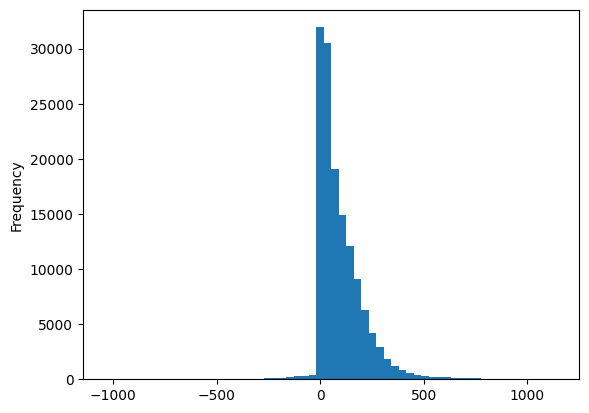

In [143]:
#calculate difference between attendance time of 1st and second pump arrival
#despite which arrives first

diff = data['SecondPumpArriving_AttendanceTime'] - data['FirstPumpArriving_AttendanceTime']
diff.plot(kind='hist', bins=60)

Notional Cost is the time spent multiplied by notional annual cost of a pump. However, it appears that this is the cost associated with the incident for 1 pump.

Since most pumps arrive in the same hour, the approximate true cost of an incident would be the Notional Cost multiplied by the number of pumps, assuming all the pumps remain until the end.

**True Cost** = **Notional Cost (£) * PumpCount**

## Renaming and rearranging columns

In [145]:
data.columns

Index(['ID', 'DateOfCall', 'Year', 'TimeOfCall', 'Hour', 'IncidentCategory',
       'IncidentType', 'PropertyCategory', 'PropertyType', 'Postcode',
       'AreaCode', 'Borough', 'Ward', 'Latitude', 'Longitude',
       'IncidentStationGround', '1stPumpResponseTime', '1stPumpStation',
       '2ndPumpResponseTime', '2ndPumpStation', 'StationsWithPumpsAttending',
       'AttendingPumps', 'PumpHours', 'Notional Cost (£)', 'Calls'],
      dtype='object')

In [144]:
# rename StopCodeDescription to IncidentCategory and IncidentGroup to IncidentType
data.rename(columns={'IncidentNumber': 'ID',
                     'StopCodeDescription': 'IncidentType',
                     'CalYear': 'Year',
                     'HourOfCall': 'Hour',
                     'IncGeo_BoroughName': 'Borough',
                     'IncGeo_WardNameNew': 'Ward',
                     'Postcode_full': 'Postcode',
                     'Postcode_district': 'AreaCode',
                     'FirstPumpArriving_AttendanceTime': '1stPumpResponseTime',
                     'FirstPumpArriving_DeployedFromStation': '1stPumpStation',
                     'SecondPumpArriving_AttendanceTime': '2ndPumpResponseTime',
                     'SecondPumpArriving_DeployedFromStation': '2ndPumpStation',
                     'NumPumpsAttending': 'AttendingPumps',
                     'NumCalls': 'Calls',
                     'NumStationsWithPumpsAttending': 'StationsWithPumpsAttending',
                     'PumpHoursRoundUp': 'PumpHours',
                     'Notional Cost (£)': 'NotionalCost(£)'
                     'IncidentGroup': 'IncidentCategory'}, inplace=True)


## Creating new columns

- attendance time in hours and minutes for 1st and 2nd pump
- Pump Rate
- Approximate Incident Cost

In [149]:
#columns PumpRate(£) and IncidentCost(~£)
data['PumpRate(£)'] = data['NotionalCost(£)'] / data['PumpHours']
data['IncidentCost(£)'] = data['NotionalCost(£)'] * data['AttendingPumps']

In [153]:
info = info2(data, 850)

Table shape: 381366 rows and 27 columns.

Size: 10296882 cells

11 or 41.0% out of 27 columns have missing values.

Columns with missing values: 
['Postcode', '1stPumpResponseTime', '1stPumpStation', '2ndPumpResponseTime', '2ndPumpStation', 'StationsWithPumpsAttending', 'AttendingPumps', 'PumpHours', 'NotionalCost(£)', 'PumpRate(£)', 'IncidentCost(£)']

770891 missing values or 7.49% of all values.

No duplicated rows.



In [154]:
data.to_csv('London Fire Brigade 2020-2023_transformed.csv')

# Final notes:

- Original dataset is relatevely messy
- Some columns required only renaming and rearranging
- There are missing values but most (if not all) could be restored with relatively good accuracy (if not complete).
- Data diagnostics show that data not necessarily follows specific standards of value input.
- Procedures like xxx were applied to the data to make it more consistent.
- Data has extreme outliers here and there which could be duo to error in aggregations or some sort of data mismatching.
- Most of the problems revolve around values in columns related to location information.
- 500,000+ missing values restored
- The final dataset that is a product of transforming the original data will serve the purpose of the project it is intended for.
- Label encoding and further transformations could be applied to the data
- Pretty much all issues (if not all) could be fixed using some external data in case someone needs super clean dataset.